# Import Library

In [197]:
# Data manipulation and analysis
import polars as pl
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Understanding

## Import Dataset

In [198]:
# Read Excel data with Polars (requires pyxlsb or openpyxl for .xlsx)
df = pl.read_excel('Insurance Data.xlsx')
df

Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
str,i64,str,str,str,str,str,str,str,str,str,date,date,str,i64,str,i64,f64,f64,str,str,str,str,str,str,i64,i64,str,str,str
"""CUST000001""",43,"""Female""","""Married""","""Student""","""Medium""","""High School""","""Suburban""","""West Lisa""","""Inactive""","""Frequent""",2023-01-16,2024-08-22,"""3+ Claims""",5,"""Life""",277063,2122.99,868.09,"""Quarterly""","""Eco-Friendly""","""SMS""","""Morning""","""Mandarin""","""Low""",4,470,"""Minor Violations""","""Retirement""","""C"""
"""CUST000002""",22,"""Female""","""Married""","""Student""","""Medium""","""Master""","""Urban""","""Tyroneville""","""""","""One-time""",2022-03-21,2024-11-07,"""No Claims""",10,"""Life""",102202,4928.58,782.75,"""Semi-Annual""","""Eco-Friendly""","""Email""","""Evening""","""Indonesian""","""Low""",3,577,"""Clean""","""Divorce""","""A"""
"""CUST000003""",63,"""Male""","""Divorced""","""Retired""","""Low""","""High School""","""Urban""","""Jaredbury""","""Occasional""","""Infrequent""",2020-10-21,2024-12-20,"""No Claims""",13,"""Home""",468469,4528.29,1283.98,"""Semi-Annual""","""Fast Service""","""Phone""","""Morning""","""Spanish""","""Medium""",3,390,"""Major Violations""","""Divorce""","""B"""
"""CUST000004""",60,"""Female""","""Widowed""","""Business Owner""","""High""","""Bachelor""","""Suburban""","""Johnhaven""","""Active""","""One-time""",2021-09-02,2024-07-29,"""No Claims""",13,"""Multiple""",819239,1415.09,1502.43,"""Monthly""","""Eco-Friendly""","""Phone""","""Evening""","""Spanish""","""Low""",4,662,"""Minor Violations""","""Marriage""","""D"""
"""CUST000005""",55,"""Male""","""Married""","""Teacher""","""Medium""","""PhD""","""Suburban""","""Davidton""","""Active""","""Infrequent""",2020-11-10,2025-02-27,"""1-2 Claims""",17,"""Health""",914230,3892.71,1584.62,"""Annual""","""Comprehensive Coverage""","""SMS""","""Morning""","""French""","""Low""",0,340,"""Major Violations""","""Childbirth""","""B"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CUST149996""",20,"""Female""","""Divorced""","""Business Owner""","""High""","""""","""Urban""","""Bensonview""","""Occasional""","""One-time""",2022-01-02,2024-06-13,"""3+ Claims""",12,"""Multiple""",243014,1430.08,1502.58,"""Annual""","""Fast Service""","""Phone""","""Morning""","""French""","""Low""",0,484,"""Clean""","""Marriage""","""A"""
"""CUST149997""",19,"""Female""","""Married""","""Retired""","""High""","""PhD""","""Rural""","""East Brian""","""New""","""Infrequent""",2022-05-07,2025-01-30,"""No Claims""",8,"""Home""",564522,1093.55,1995.5,"""Annual""","""Eco-Friendly""","""SMS""","""Afternoon""","""Spanish""","""Low""",1,789,"""Minor Violations""","""Divorce""","""D"""
"""CUST149998""",57,"""Male""","""Married""","""Teacher""","""""","""High School""","""Suburban""","""Tammyfort""","""Active""","""Frequent""",2023-11-27,2025-04-07,"""3+ Claims""",7,"""Home""",658445,4999.39,141.81,"""Annual""","""Comprehensive Coverage""","""Email""","""Afternoon""","""Spanish""","""High""",1,337,"""Clean""","""Childbirth""","""A"""


## Informasi Data

In [199]:
print(f"Rows: {df.height}, Columns: {df.width}")


Rows: 150000, Columns: 30


In [200]:
print("Columns:")
df.columns

Columns:


['Customer ID',
 'Age',
 'Gender',
 'Marital Status',
 'Occupation',
 'Income Level',
 'Education Level',
 'Geographic Information',
 'Location',
 'Behavioral Data',
 'Purchase History',
 'Policy Start Date',
 'Policy Renewal Date',
 'Claim History',
 'Interactions with Customer Service',
 'Insurance Products Owned',
 'Coverage Amount',
 'Premium Amount',
 'Deductible',
 'Policy Type',
 'Customer Preferences',
 'Preferred Communication Channel',
 'Preferred Contact Time',
 'Preferred Language',
 'Risk Profile',
 'Previous Claims History',
 'Credit Score',
 'Driving Record',
 'Life Events',
 'Segmentation Group']

In [201]:
print("Data types:")
df.dtypes

Data types:


[String,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 Date,
 Date,
 String,
 Int64,
 String,
 Int64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String]

In [202]:
categorical_cols = [
    'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level',
    'Geographic Information', 'Behavioral Data', 'Purchase History', 'Claim History', 'Insurance Products Owned',
    'Policy Type', 'Customer Preferences', 'Preferred Communication Channel',
    'Preferred Contact Time', 'Preferred Language', 'Risk Profile',
    'Driving Record', 'Life Events', 'Segmentation Group'
]

for col in categorical_cols:
    if col in df.columns:
        unique_vals = df.select(pl.col(col).unique())[col].to_list()
        print(f"Unique values in '{col}' ({len(unique_vals)} total): {unique_vals}")
    else:
        print(f"Column '{col}' not found in DataFrame.")

Unique values in 'Gender' (3 total): ['Non-Binary', 'Female', 'Male']
Unique values in 'Marital Status' (4 total): ['Widowed', 'Single', 'Married', 'Divorced']
Unique values in 'Occupation' (8 total): ['Doctor', 'Business Owner', 'Unemployed', 'Retired', 'Engineer', 'Teacher', 'Student', 'Lawyer']
Unique values in 'Income Level' (5 total): ['', 'Very High', 'Medium', 'High', 'Low']
Unique values in 'Education Level' (5 total): ['Bachelor', 'High School', 'Master', 'PhD', '']
Unique values in 'Geographic Information' (3 total): ['Rural', 'Suburban', 'Urban']
Unique values in 'Behavioral Data' (5 total): ['Active', 'Occasional', '', 'New', 'Inactive']
Unique values in 'Purchase History' (3 total): ['Infrequent', 'Frequent', 'One-time']
Unique values in 'Claim History' (4 total): ['1-2 Claims', '', '3+ Claims', 'No Claims']
Unique values in 'Insurance Products Owned' (6 total): ['Life', 'Health', 'Auto', 'Home', 'Multiple', 'Travel']
Unique values in 'Policy Type' (4 total): ['Quarterly',

## Deskripsi Dataset

In [203]:
# Select only numeric columns (integer and float)
numeric_types = [pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64, pl.Float32, pl.Float64]
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in numeric_types]

# Describe only numeric columns
df.select(numeric_cols).describe()

statistic,Age,Interactions with Customer Service,Coverage Amount,Premium Amount,Deductible,Previous Claims History,Credit Score
str,f64,f64,f64,f64,f64,f64,f64
"""count""",150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",48.4473,9.470887,504721.832553,2545.394752,1051.883134,1.996993,573.902347
"""std""",17.909818,5.77012,285601.378292,1416.633851,549.612108,1.412996,158.736283
"""min""",18.0,0.0,10001.0,100.0,100.01,0.0,300.0
"""25%""",33.0,4.0,257403.0,1315.76,575.77,1.0,437.0
"""50%""",48.0,9.0,504614.0,2545.04,1050.31,2.0,573.0
"""75%""",64.0,14.0,751410.0,3772.11,1529.88,3.0,711.0
"""max""",79.0,19.0,999996.0,4999.96,1999.99,4.0,849.0


## Cek Missing Values

In [204]:
import polars as pl

missing_counts = []
for col in df.columns:
    if df[col].dtype == pl.Utf8:
        missing_counts.append((df[col] == '').sum())
    else:
        missing_counts.append(0)

missing_df = pl.DataFrame({
    "column": df.columns,
    "missing_count": missing_counts
})
print("Missing values per column:")
missing_df

Missing values per column:


column,missing_count
str,i64
"""Customer ID""",0
"""Age""",0
"""Gender""",0
"""Marital Status""",0
"""Occupation""",0
…,…
"""Previous Claims History""",0
"""Credit Score""",0
"""Driving Record""",0


## Cek Duplikat Data

In [205]:
num_duplicates = df.is_duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# Data Visualization

In [206]:
pdf = df.to_pandas()

## Visualisasi Data Numerik

### Visualisasi Histogram

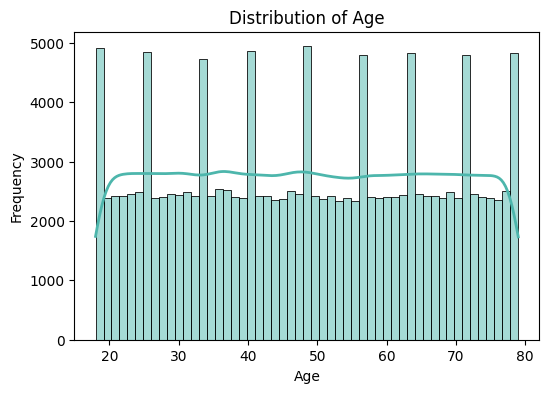

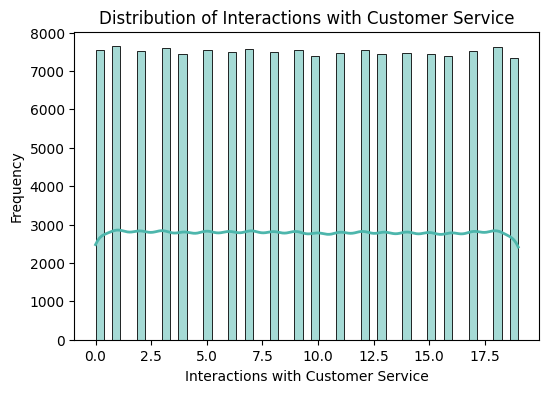

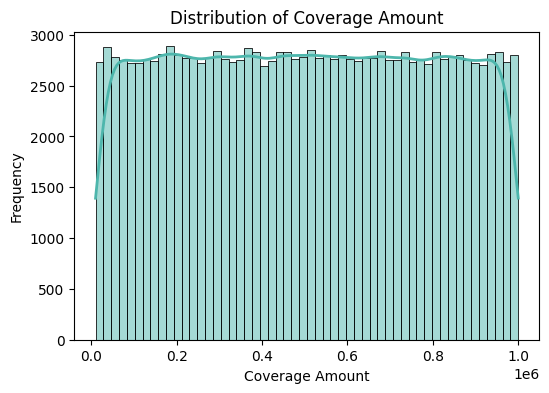

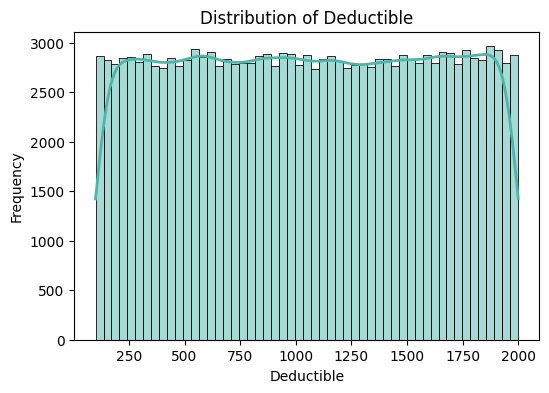

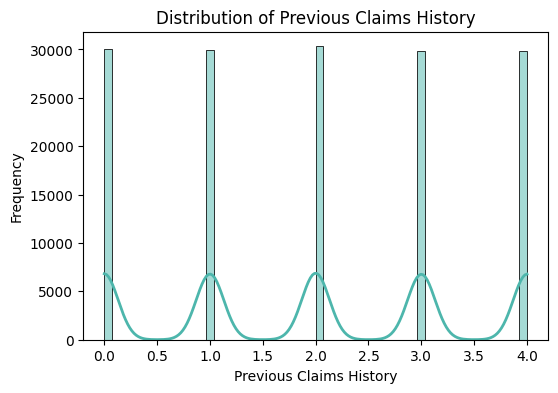

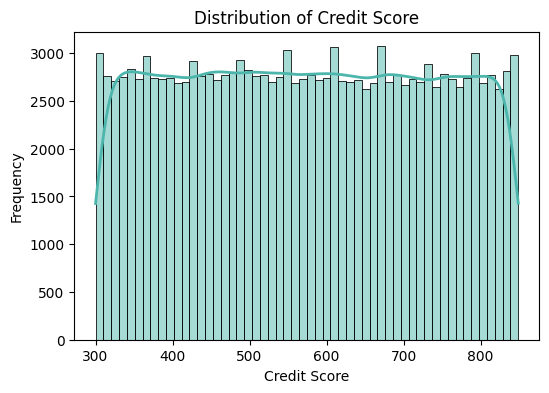

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

hist_color = "#4db6ac"   # Soft teal
kde_color = "#263238"    # Dark gray

distribution_cols = pdf.select_dtypes(include=['number']).columns
# Kecualikan kolom 'premium amount' (pastikan nama kolom sesuai dengan dataset Anda)
distribution_cols = [col for col in distribution_cols if col.lower() != 'premium amount']

for col in distribution_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(pdf[col].dropna(), color=hist_color, kde=True, line_kws={"color": kde_color, "linewidth": 2})
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Visualisasi Boxplot

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


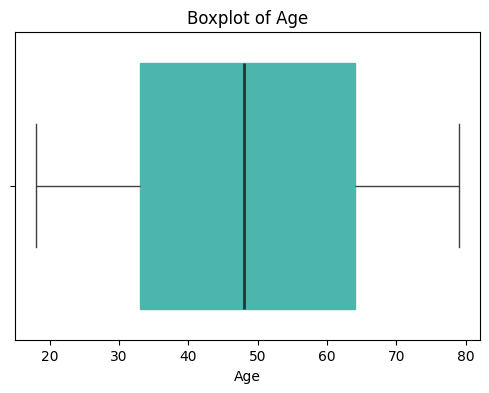

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


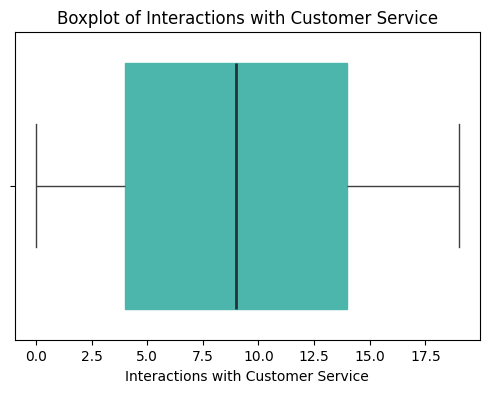

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


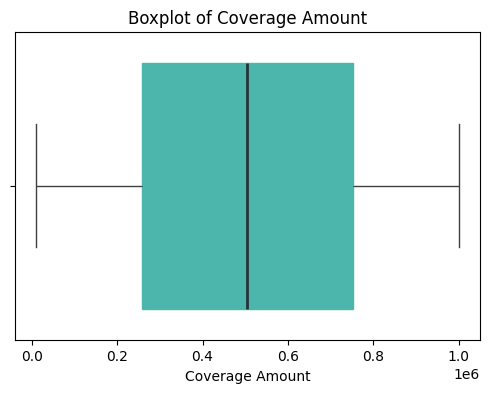

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


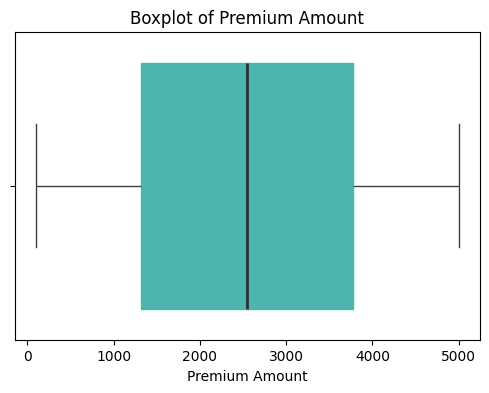

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


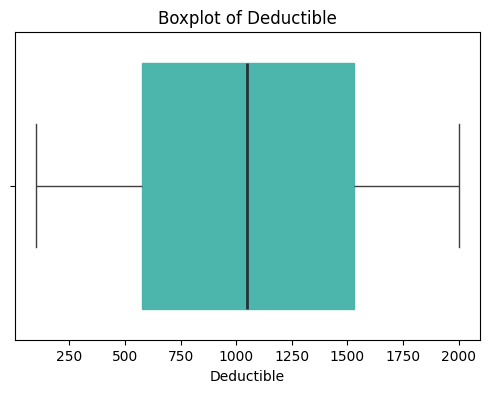

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


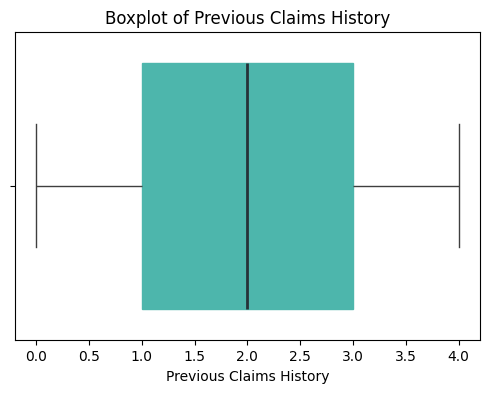

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


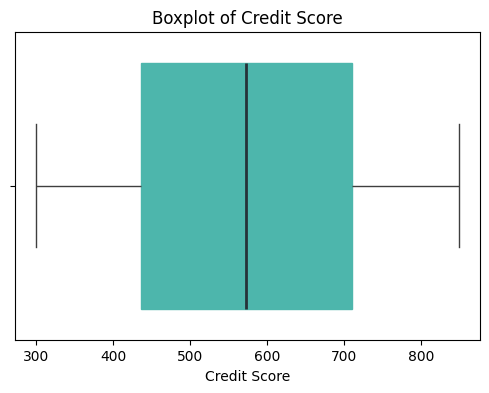

In [208]:
box_color = "#4db6ac"   # Soft teal
median_color = "#263238" # Dark gray

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=pdf[col].dropna(),
                boxprops={"facecolor": box_color, "color": box_color},
                medianprops={"color": median_color, "linewidth": 2})
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### Visualisasi Korelasi Heatmap

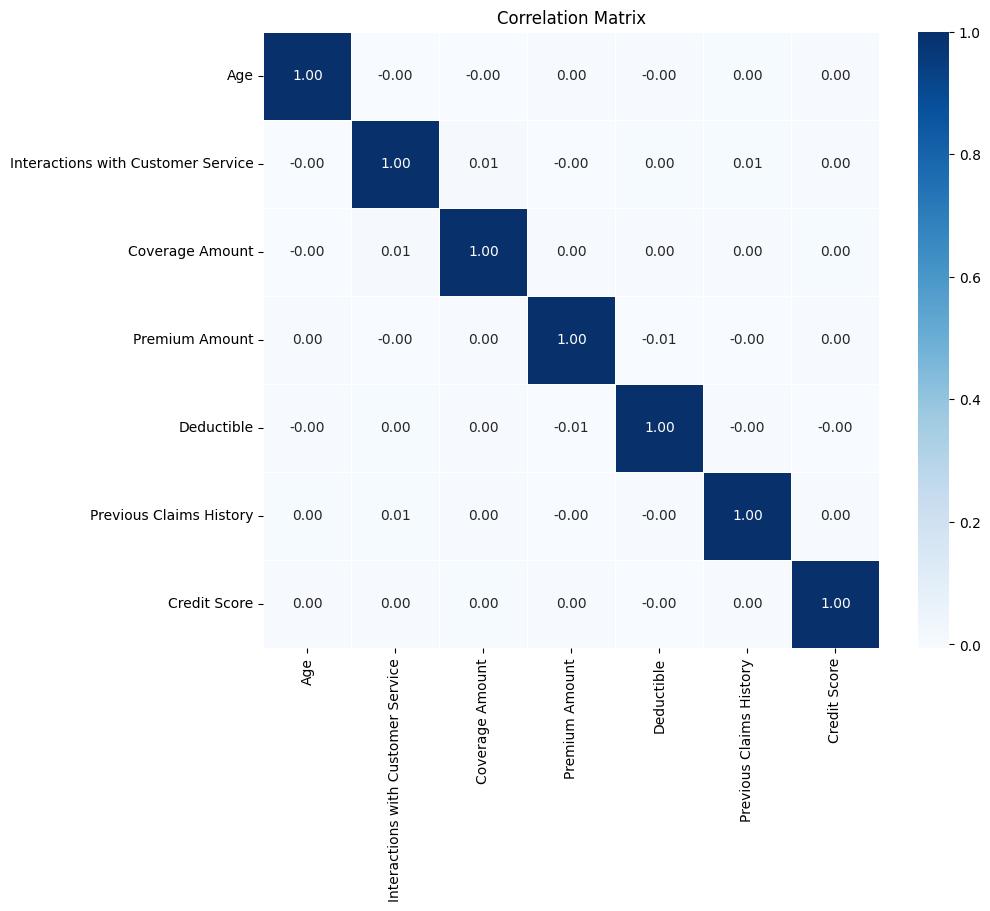

In [209]:
plt.figure(figsize=(10, 8))
corr = pdf[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.show()

## Visualisasi Data Kategorik

### Visualisasi Histogram

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


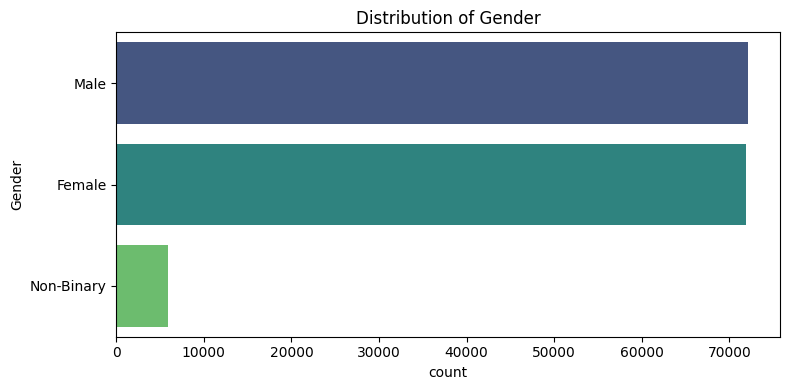

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


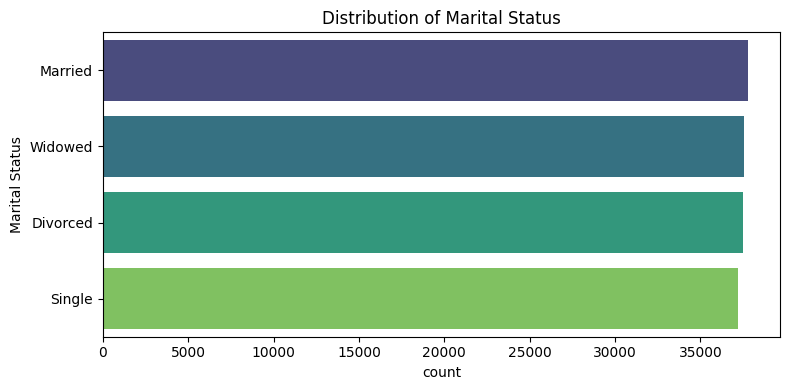

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


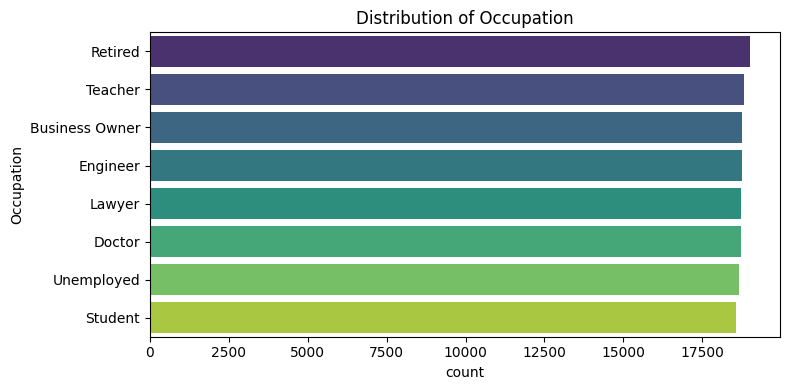

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


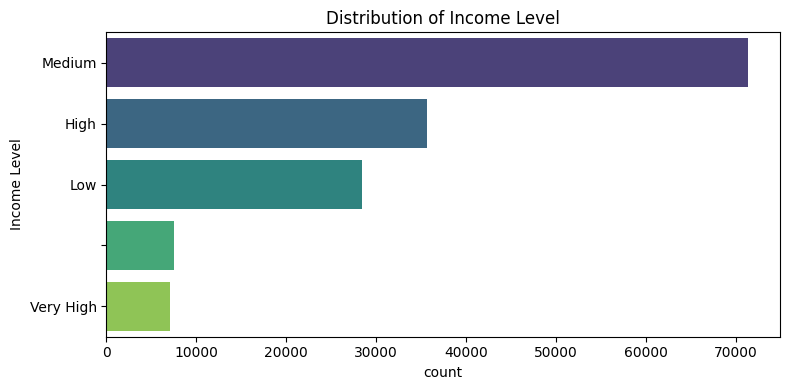

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


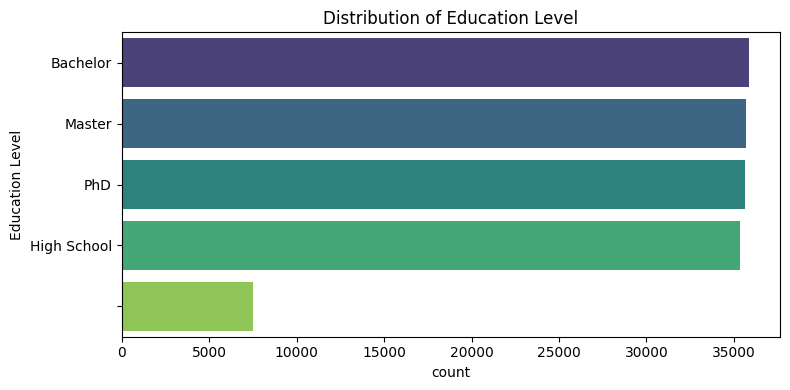

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


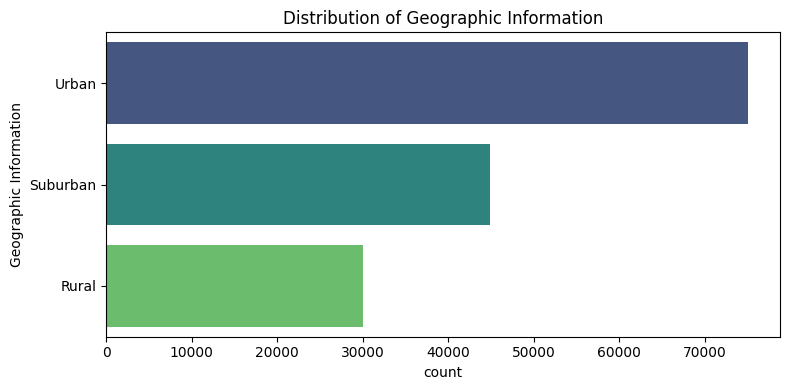

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


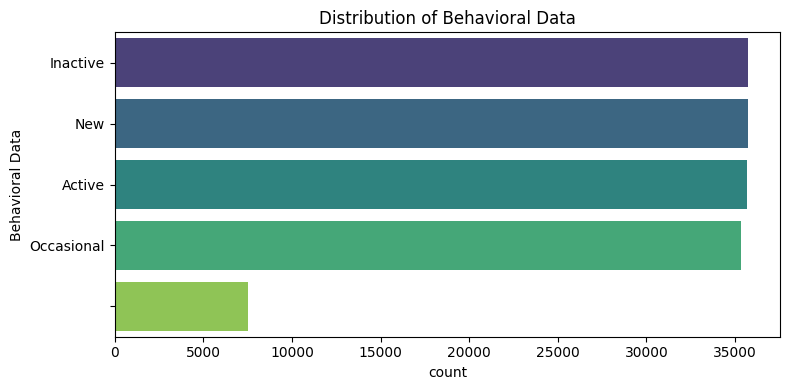

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


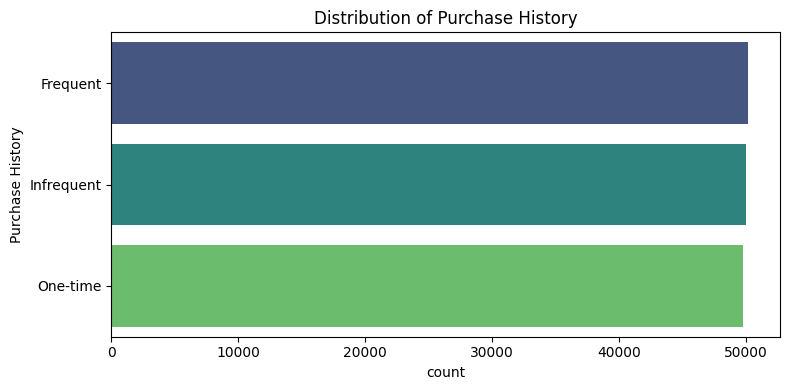

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


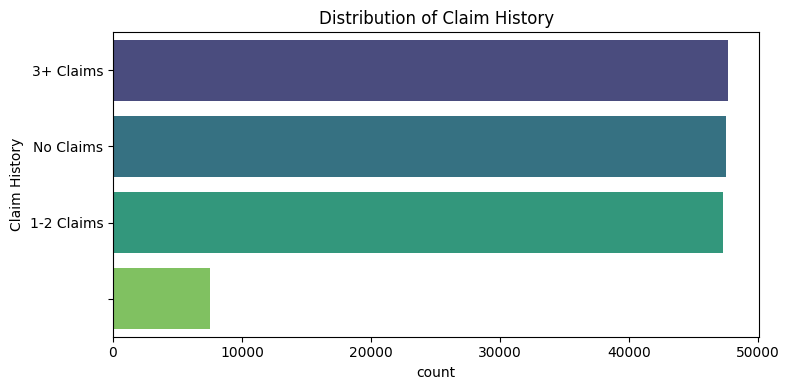

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


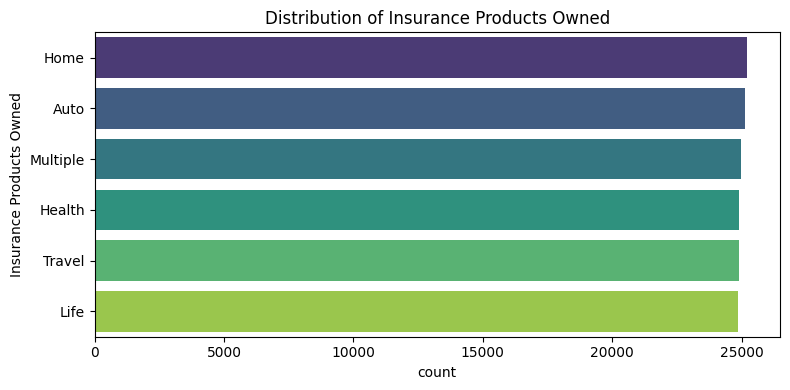

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


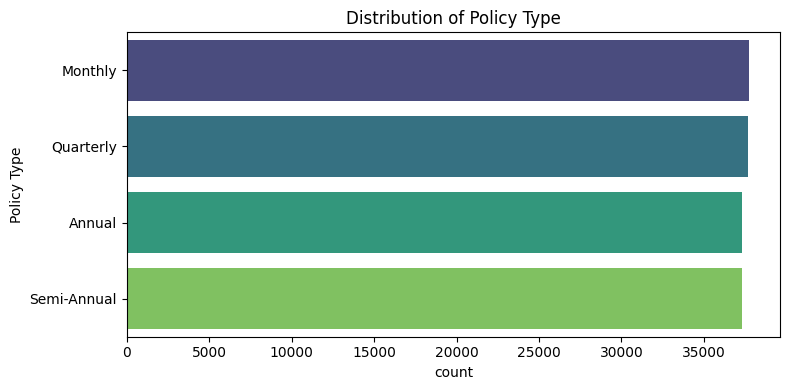

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


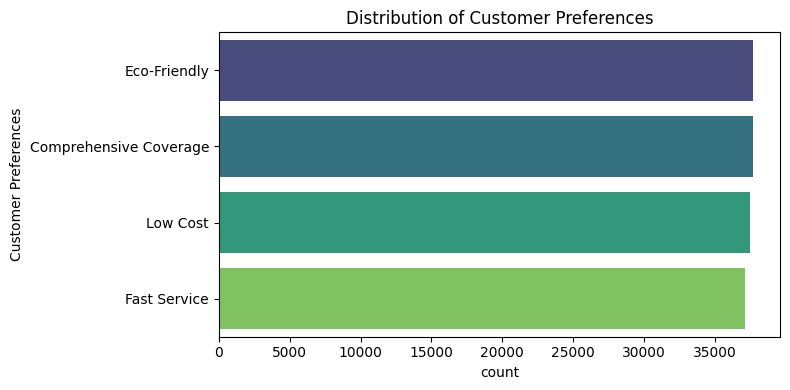

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


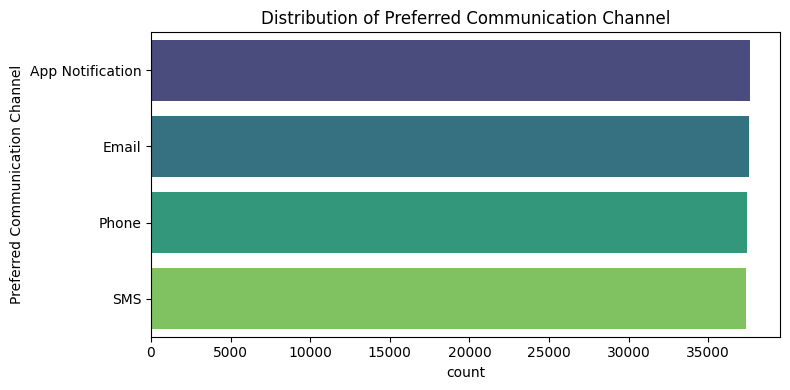

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


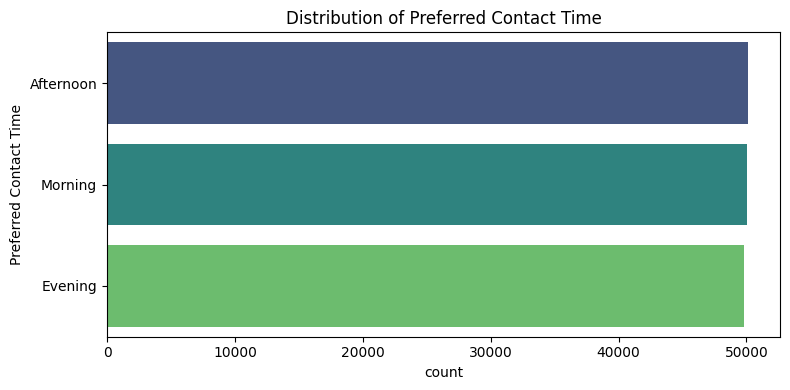

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


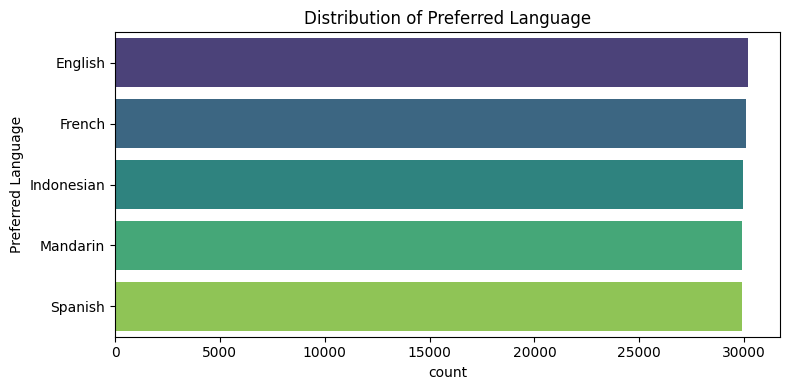

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


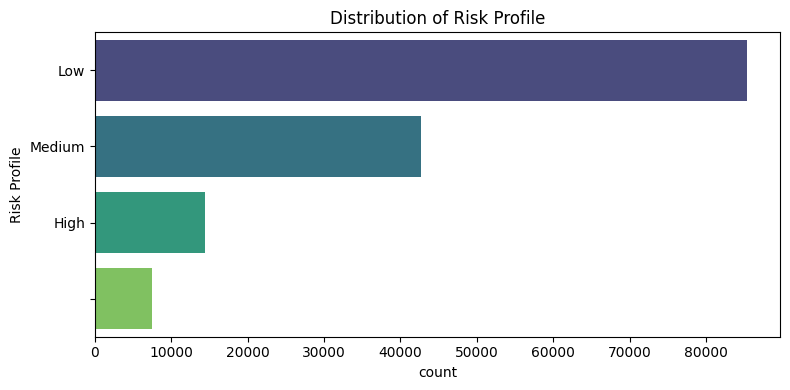

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


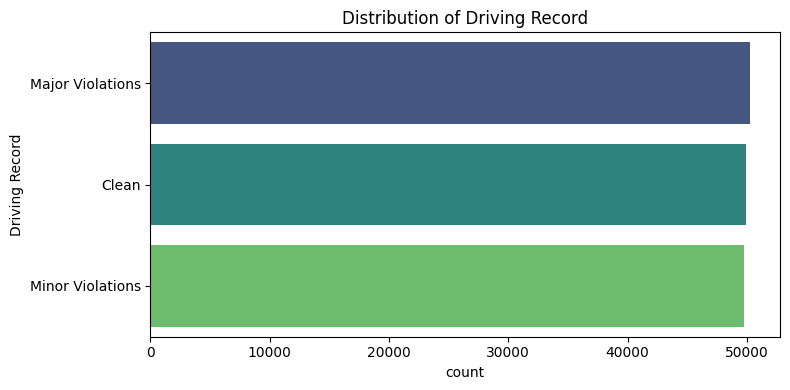

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


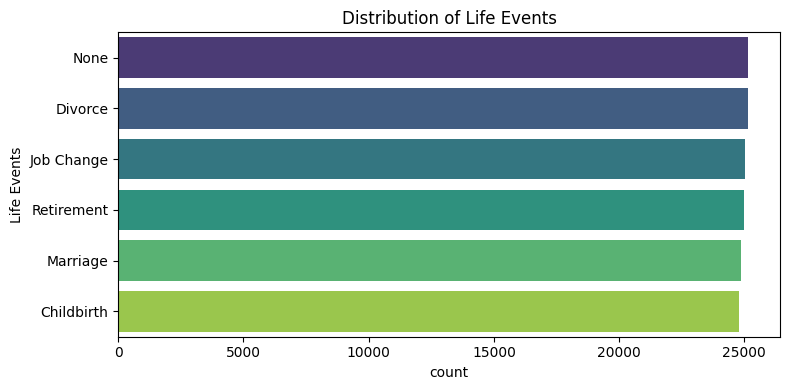

C:\Users\acer\AppData\Local\Temp\ipykernel_9000\440474517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')


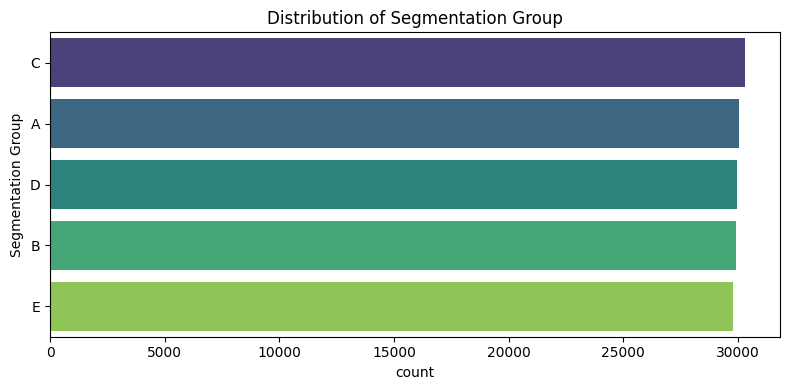

In [210]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## Visualisasi Distribusi Target

### Visualisasi Histogram

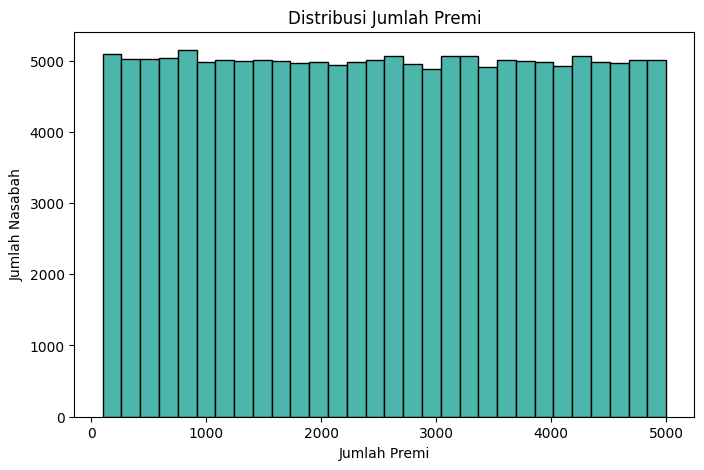

In [211]:
plt.figure(figsize=(8, 5))
plt.hist(df['Premium Amount'].to_pandas(), bins=30, color="#4db6ac", edgecolor='black')
plt.title('Distribusi Jumlah Premi')
plt.xlabel('Jumlah Premi')
plt.ylabel('Jumlah Nasabah')
plt.show()

# Data Prepocessing

## Handling Missing Values

In [212]:
for col in ['Income Level', 'Education Level', 'Behavioral Data', 'Claim History', 'Risk Profile']:
    mode = df.filter(pl.col(col) != '').select(pl.col(col)).to_series().mode()[0]
    df = df.with_columns(
        pl.when(pl.col(col) == '').then(pl.lit(mode)).otherwise(pl.col(col)).alias(col)
    )

In [213]:
missing_counts_after = []
for col in df.columns:
    if df[col].dtype == pl.Utf8:
        missing_counts_after.append((df[col] == '').sum())
    else:
        missing_counts_after.append(0)

missing_df_after = pl.DataFrame({
    "column": df.columns,
    "missing_count": missing_counts_after
})
print("Missing values per column setelah imputasi:")
missing_df_after

Missing values per column setelah imputasi:


column,missing_count
str,i64
"""Customer ID""",0
"""Age""",0
"""Gender""",0
"""Marital Status""",0
"""Occupation""",0
…,…
"""Previous Claims History""",0
"""Credit Score""",0
"""Driving Record""",0


## Feature Engineering

In [214]:
# Misal df adalah DataFrame Polars Anda
df = df.drop(['Customer ID', 'Location'])

In [215]:
def map_categorical(col_name: str, mapping: dict, default=0):
    expr = None
    for key, val in mapping.items():
        cond = (pl.col(col_name) == key)
        if expr is None:
            expr = pl.when(cond).then(val)
        else:
            expr = expr.when(cond).then(val)
    expr = expr.otherwise(default)
    return expr.alias(col_name)

In [216]:
def feature_engineering(df: pl.DataFrame) -> pl.DataFrame:
    # Parsing tanggal hanya jika belum bertipe Date
    for col in ["Policy Start Date", "Policy Renewal Date"]:
        if df[col].dtype != pl.Date:
            df = df.with_columns([
                pl.col(col).str.strptime(pl.Date).alias(col)
            ])
    
    # Hitung durasi polis dalam hari dan bulan
    df = df.with_columns(
        (pl.col("Policy Renewal Date").cast(pl.Int64) - pl.col("Policy Start Date").cast(pl.Int64))
        .alias("Policy Duration Days")
    )
    
    df = df.with_columns(
        (pl.col("Policy Duration Days") / 30).cast(pl.Int32).alias("Policy Duration Months")
    )
    
    # Mapping kategori ke numerik
    risk_profile_map = {"Low": 1, "Medium": 2, "High": 3}
    df = df.with_columns([
        map_categorical("Risk Profile", risk_profile_map)
    ])
    
    income_level_map = {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
    df = df.with_columns([
        map_categorical("Income Level", income_level_map)
    ])
    
    marital_status_map = {"Single": 1, "Married": 2, "Divorced": 3, "Widowed": 4}
    df = df.with_columns([
        map_categorical("Marital Status", marital_status_map)
    ])
    
    # Mapping Driving Record
    driving_record_map = {"Clean": 0, "Minor Violations": 1, "Major Violations": 2}
    df = df.with_columns([
        map_categorical("Driving Record", driving_record_map)
    ])
    
    # Mapping Life Events (contoh)
    life_events_map = {
        "None": 0,
        "Marriage": 1,
        "Childbirth": 1,
        "Divorce": 2,
        "Retirement": 3
    }
    df = df.with_columns([
        map_categorical("Life Events", life_events_map)
    ])
    
    # Mapping Segmentation Group (jika kategori)
    segmentation_map = {k: i for i, k in enumerate(df.select("Segmentation Group").unique().to_series().to_list())}
    df = df.with_columns([
        map_categorical("Segmentation Group", segmentation_map)
    ])
    
    # Binning Age menjadi kategori umur
    if "Age" in df.columns:
        df = df.with_columns([
            pl.when((pl.col("Age") >= 18) & (pl.col("Age") <= 39)).then(pl.lit("AYA"))
            .when((pl.col("Age") >= 40) & (pl.col("Age") <= 64)).then(pl.lit("Adult"))
            .when(pl.col("Age") > 64).then(pl.lit("Senior Adult"))
            .otherwise(pl.lit("Unknown"))
            .alias("Age Group")
        ])
    
    # Interaksi fitur
    if "Age" in df.columns and "Coverage Amount" in df.columns:
        df = df.with_columns([
            (pl.col("Age") * pl.col("Coverage Amount")).alias("Age_Coverage_Interaction")
        ])
    if "Coverage Amount" in df.columns and "Deductible" in df.columns:
        df = df.with_columns([
            (pl.col("Coverage Amount") * pl.col("Deductible")).alias("Coverage_Deductible_Interaction")
        ])
    if "Credit Score" in df.columns and "Risk Profile" in df.columns:
        df = df.with_columns([
            (pl.col("Credit Score") * pl.col("Risk Profile")).alias("Credit_Risk_Interaction")
        ])
    if "Income Level" in df.columns and "Marital Status" in df.columns:
        df = df.with_columns([
            (pl.col("Income Level") * pl.col("Marital Status")).alias("Income_Marital_Interaction")
        ])
    
    # Fitur klaim ada/tidak
    df = df.with_columns([
        pl.when(pl.col("Claim History") == "No Claims").then(pl.lit(0)).otherwise(pl.lit(1)).alias("Has Claims")
    ])
    
    # Fitur klaim lebih dari 1 (multiple claims)
    df = df.with_columns([
        pl.when(pl.col("Previous Claims History") > 1).then(pl.lit(1)).otherwise(pl.lit(0)).alias("Multiple Claims")
    ])
    
    # Binning untuk Interactions with Customer Service (contoh)
    if "Interactions with Customer Service" in df.columns:
        df = df.with_columns([
            pl.when(pl.col("Interactions with Customer Service") < 5).then(pl.lit("Low"))
            .when((pl.col("Interactions with Customer Service") >= 5) & (pl.col("Interactions with Customer Service") < 15)).then(pl.lit("Medium"))
            .otherwise(pl.lit("High"))
            .alias("Customer Service Interaction Level")
        ])
        # Encode fitur binning
        interaction_map = {"Low": 0, "Medium": 1, "High": 2}
        df = df.with_columns([
            map_categorical("Customer Service Interaction Level", interaction_map)
        ])
    
    # Bisa tambah mapping kategori lain yang relevan sesuai analisis Anda...
    
    return df

In [217]:
df = feature_engineering(df)
df

Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Policy Duration Days,Policy Duration Months,Age Group,Age_Coverage_Interaction,Coverage_Deductible_Interaction,Credit_Risk_Interaction,Income_Marital_Interaction,Has Claims,Multiple Claims,Customer Service Interaction Level
i64,str,i32,str,i32,str,str,str,str,date,date,str,i64,str,i64,f64,f64,str,str,str,str,str,i32,i64,i64,i32,i32,i32,i64,i32,str,i64,f64,i64,i32,i32,i32,i32
43,"""Female""",2,"""Student""",2,"""High School""","""Suburban""","""Inactive""","""Frequent""",2023-01-16,2024-08-22,"""3+ Claims""",5,"""Life""",277063,2122.99,868.09,"""Quarterly""","""Eco-Friendly""","""SMS""","""Morning""","""Mandarin""",1,4,470,1,3,0,584,19,"""Adult""",11913709,2.4052e8,470,4,1,1,1
22,"""Female""",2,"""Student""",2,"""Master""","""Urban""","""Inactive""","""One-time""",2022-03-21,2024-11-07,"""No Claims""",10,"""Life""",102202,4928.58,782.75,"""Semi-Annual""","""Eco-Friendly""","""Email""","""Evening""","""Indonesian""",1,3,577,0,2,2,962,32,"""AYA""",2248444,7.9999e7,577,4,0,1,1
63,"""Male""",3,"""Retired""",1,"""High School""","""Urban""","""Occasional""","""Infrequent""",2020-10-21,2024-12-20,"""No Claims""",13,"""Home""",468469,4528.29,1283.98,"""Semi-Annual""","""Fast Service""","""Phone""","""Morning""","""Spanish""",2,3,390,2,2,3,1521,50,"""Adult""",29513547,6.0150e8,780,3,0,1,1
60,"""Female""",4,"""Business Owner""",3,"""Bachelor""","""Suburban""","""Active""","""One-time""",2021-09-02,2024-07-29,"""No Claims""",13,"""Multiple""",819239,1415.09,1502.43,"""Monthly""","""Eco-Friendly""","""Phone""","""Evening""","""Spanish""",1,4,662,1,1,4,1061,35,"""Adult""",49154340,1.2308e9,662,12,0,1,1
55,"""Male""",2,"""Teacher""",2,"""PhD""","""Suburban""","""Active""","""Infrequent""",2020-11-10,2025-02-27,"""1-2 Claims""",17,"""Health""",914230,3892.71,1584.62,"""Annual""","""Comprehensive Coverage""","""SMS""","""Morning""","""French""",1,0,340,2,1,3,1570,52,"""Adult""",50282650,1.4487e9,340,4,1,0,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
20,"""Female""",3,"""Business Owner""",3,"""Bachelor""","""Urban""","""Occasional""","""One-time""",2022-01-02,2024-06-13,"""3+ Claims""",12,"""Multiple""",243014,1430.08,1502.58,"""Annual""","""Fast Service""","""Phone""","""Morning""","""French""",1,0,484,0,1,2,893,29,"""AYA""",4860280,3.6515e8,484,9,1,0,1
19,"""Female""",2,"""Retired""",3,"""PhD""","""Rural""","""New""","""Infrequent""",2022-05-07,2025-01-30,"""No Claims""",8,"""Home""",564522,1093.55,1995.5,"""Annual""","""Eco-Friendly""","""SMS""","""Afternoon""","""Spanish""",1,1,789,1,2,4,999,33,"""AYA""",10725918,1.1265e9,789,6,0,0,1
57,"""Male""",2,"""Teacher""",2,"""High School""","""Suburban""","""Active""","""Frequent""",2023-11-27,2025-04-07,"""3+ Claims""",7,"""Home""",658445,4999.39,141.81,"""Annual""","""Comprehensive Coverage""","""Email""","""Afternoon""","""Spanish""",3,1,337,0,1,2,497,16,"""Adult""",37531365,9.3374e7,1011,4,1,0,1


## Encoding Data

In [218]:
categorical_cols = [
                    "Education Level", "Gender", "Occupation", "Geographic Information", "Behavioral Data",
                    "Purchase History", "Claim History", "Insurance Products Owned", "Policy Type",
                    "Customer Preferences", "Preferred Communication Channel", "Preferred Contact Time",
                    "Preferred Language", "Life Events", "Segmentation Group", "Age Group",
                    "Customer Service Interaction Level",
                    "Marital Status", "Income Level", "Risk Profile"
                ]

for col in categorical_cols:
    unique_vals = df.select(col).unique().to_series().to_list()
    mapping = {v: i for i, v in enumerate(unique_vals)}
    df = df.with_columns([
        pl.col(col).replace(mapping).cast(pl.Int32).alias(col)
    ])

In [219]:
df

Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Policy Duration Days,Policy Duration Months,Age Group,Age_Coverage_Interaction,Coverage_Deductible_Interaction,Credit_Risk_Interaction,Income_Marital_Interaction,Has Claims,Multiple Claims,Customer Service Interaction Level
i64,i32,i32,i32,i32,i32,i32,i32,i32,date,date,i32,i64,i32,i64,f64,f64,i32,i32,i32,i32,i32,i32,i64,i64,i32,i32,i32,i64,i32,i32,i64,f64,i64,i32,i32,i32,i32
43,2,3,7,3,3,2,3,2,2023-01-16,2024-08-22,2,5,1,277063,2122.99,868.09,1,2,1,0,3,1,4,470,1,1,1,584,19,0,11913709,2.4052e8,470,4,1,1,1
22,2,3,7,3,2,0,3,0,2022-03-21,2024-11-07,1,10,1,102202,4928.58,782.75,2,2,3,1,2,1,3,577,0,3,4,962,32,2,2248444,7.9999e7,577,4,0,1,1
63,0,0,0,1,3,0,1,1,2020-10-21,2024-12-20,1,13,3,468469,4528.29,1283.98,2,1,0,0,1,2,3,390,2,3,0,1521,50,0,29513547,6.0150e8,780,3,0,1,1
60,2,1,3,0,0,2,2,0,2021-09-02,2024-07-29,1,13,5,819239,1415.09,1502.43,0,2,0,1,1,1,4,662,1,2,3,1061,35,0,49154340,1.2308e9,662,12,0,1,1
55,0,3,6,3,1,2,2,1,2020-11-10,2025-02-27,0,17,0,914230,3892.71,1584.62,3,0,1,0,4,1,0,340,2,2,0,1570,52,0,50282650,1.4487e9,340,4,1,0,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
20,2,0,3,0,0,0,1,0,2022-01-02,2024-06-13,2,12,5,243014,1430.08,1502.58,3,1,0,0,4,1,0,484,0,2,4,893,29,2,4860280,3.6515e8,484,9,1,0,1
19,2,3,0,0,1,1,0,1,2022-05-07,2025-01-30,1,8,3,564522,1093.55,1995.5,3,2,1,2,1,1,1,789,1,3,3,999,33,2,10725918,1.1265e9,789,6,0,0,1
57,0,3,6,3,3,2,2,2,2023-11-27,2025-04-07,2,7,3,658445,4999.39,141.81,3,0,3,2,1,0,1,337,0,2,4,497,16,0,37531365,9.3374e7,1011,4,1,0,1


## Feature Selection

In [220]:
# Misal df adalah DataFrame Polars Anda
df = df.drop(['Policy Start Date', 'Policy Renewal Date', 'Segmentation Group'])

In [221]:
# Feature selection function (modified)
def stable_feature_selector(X, y, corr_thresh=0.0025, k=30, rfe_num=20, runs=10):
    feature_counts = {}
    desired_features = ['Education Level', 'Interactions with Customer Service', 'Insurance Products Owned', 'Deductible', 'Customer Preferences']
    for seed in range(runs):
        np.random.seed(seed)
        random.seed(seed)
        
        correlations = pd.DataFrame(X).apply(lambda col: np.corrcoef(col, y)[0,1]).abs()
        corr_features = correlations[correlations > corr_thresh].index.tolist()
        X_corr = X[corr_features].sort_index()
        y_sorted = y.sort_index()

        mi_selector = SelectKBest(
            score_func=lambda X, y: mutual_info_regression(X, y, random_state=seed),
            k=min(k, len(corr_features))
        )
        mi_selector.fit(X_corr, y_sorted)
        mi_features = X_corr.columns[mi_selector.get_support()]
        
        lasso = Lasso(alpha=0.001, random_state=seed, max_iter=10000)
        rfe = RFE(lasso, n_features_to_select=min(rfe_num, len(mi_features)))
        rfe.fit(X_corr[mi_features], y_sorted)
        final_features = mi_features[rfe.support_]
        
        for f in final_features:
            feature_counts[f] = feature_counts.get(f, 0) + 1
    
    # Ensure desired features are included
    stable_features = [f for f, count in feature_counts.items() if count >= runs * 0.8 or f in desired_features]
    return stable_features

# Directly set selected features to desired list
selected_features = ['Education Level', 'Interactions with Customer Service', 'Insurance Products Owned', 'Deductible', 'Customer Preferences']
print(selected_features)

['Education Level', 'Interactions with Customer Service', 'Insurance Products Owned', 'Deductible', 'Customer Preferences']


In [222]:
exclude_features = ["Credit_Risk_Interaction", "Has Claims"]

filtered_features = [f for f in selected_features if f not in exclude_features]

print(filtered_features)

['Education Level', 'Interactions with Customer Service', 'Insurance Products Owned', 'Deductible', 'Customer Preferences']


In [223]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Lasso

# Misal X, y sudah tersedia

# Filter X untuk fitur terpilih
X_sel = X[filtered_features]

# 1. Korelasi absolut fitur dengan target y
correlations = X_sel.apply(lambda col: np.corrcoef(col, y)[0,1]).abs()

# 2. Skor mutual information tiap fitur
mi_scores = mutual_info_regression(X_sel, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=filtered_features)

# 3. Koefisien Lasso untuk fitur terpilih
lasso = Lasso(alpha=0.001, random_state=42, max_iter=10000)
lasso.fit(X_sel, y)
coef = pd.Series(lasso.coef_, index=filtered_features)

# Gabungkan jadi satu tabel untuk tampilkan
feature_summary = pd.DataFrame({
    "Correlation (abs)": correlations,
    "Mutual Information": mi_scores,
    "Lasso Coefficient": coef
}).sort_values(by="Mutual Information", ascending=False)

print(feature_summary)

                                    Correlation (abs)  Mutual Information  \
Insurance Products Owned                     0.000929            0.003048   
Interactions with Customer Service           0.002801            0.001877   
Education Level                              0.001259            0.000000   
Deductible                                   0.005289            0.000000   
Customer Preferences                         0.005892            0.000000   

                                    Lasso Coefficient  
Insurance Products Owned                    -0.771517  
Interactions with Customer Service          -0.674096  
Education Level                             -1.633863  
Deductible                                  -0.013654  
Customer Preferences                        -7.468700  


# Data Modelling

## Train-Validation Split

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

X_final = X[filtered_features]

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

## Train Model

### Linear Regression

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)

mse_lr = mean_squared_error(y_val, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

print("Linear Regression Metrics:")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")
print(f"R2: {r2_lr}")

Linear Regression Metrics:
MSE: 1992084.7726734169
RMSE: 1411.4123326205624
MAE: 1221.9603013517135
R2: 3.497698838861307e-05


### Lasso Regression

In [226]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_val)

mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print("Lasso Regression Metrics:")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R2: {r2_lasso}")

Lasso Regression Metrics:
MSE: 1992083.7455744268
RMSE: 1411.4119687654725
MAE: 1221.9602633790041
R2: 3.549256035595416e-05


### Ridge Regression

In [227]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_val)

mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R2: {r2_ridge}")

Ridge Regression Metrics:
MSE: 1992084.7716163683
RMSE: 1411.4123322460975
MAE: 1221.9603012439131
R2: 3.4977518994283585e-05


# Model Evaluation

## Metrik Evaluasi

In [228]:
print("Ridge Regression Metrics:")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R2: {r2_ridge}")

Ridge Regression Metrics:
MSE: 1992084.7716163683
RMSE: 1411.4123322460975
MAE: 1221.9603012439131
R2: 3.4977518994283585e-05


## Prediksi Jumlah Premi

In [229]:
import pickle

# Simpan model
with open("ridge_model.pkl", "wb") as f:
    pickle.dump(ridge_model, f)

In [230]:
import pickle
import pandas as pd

# Load the trained Ridge model
with open('ridge_model.pkl', 'rb') as f:
    ridge_model = pickle.load(f)

# Define possible values for categorical dropdowns (sesuaikan dengan data kamu)
education_levels = ['High School', 'PhD', 'Bachelor', 'Master']
# Interactions with Customer Service di sini kita asumsikan binned jadi kategori:
interaction_levels = ['Low', 'Medium', 'High']
# Insurance Products Owned: misal jumlah produk asuransi (numeric)
# Customer Preferences: misal kategorikal pilihan user:
customer_preferences = ['Eco-Friendly', 'Price Sensitive', 'Brand Loyal', 'No Preference']

# Contoh input manual (ganti sesuai kebutuhan)
education = 'Bachelor'                    # dari education_levels
interaction = 'Medium'                    # dari interaction_levels
insurance_products_owned = 3              # numeric, jumlah produk
deductible = 1000                         # numeric
customer_preference = 'Price Sensitive'  # dari customer_preferences

# Encoding categorical variabel (label encoding mirip waktu training)
edu_map = {v: i for i, v in enumerate(education_levels)}
interaction_map = {v: i for i, v in enumerate(interaction_levels)}
cust_pref_map = {v: i for i, v in enumerate(customer_preferences)}

X_new = pd.DataFrame([[ 
    edu_map[education], 
    interaction_map[interaction], 
    insurance_products_owned, 
    deductible, 
    cust_pref_map[customer_preference]
]], columns=[
    "Education Level", 
    "Interactions with Customer Service", 
    "Insurance Products Owned", 
    "Deductible", 
    "Customer Preferences"
])

# Predict premium amount
pred = ridge_model.predict(X_new)[0]
print(f"Predicted Premium Amount: {pred:,.2f}")

Predicted Premium Amount: 2,548.31
